<a href="https://colab.research.google.com/github/SwamyYedla/Digital-Image-Processing/blob/main/Question3_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

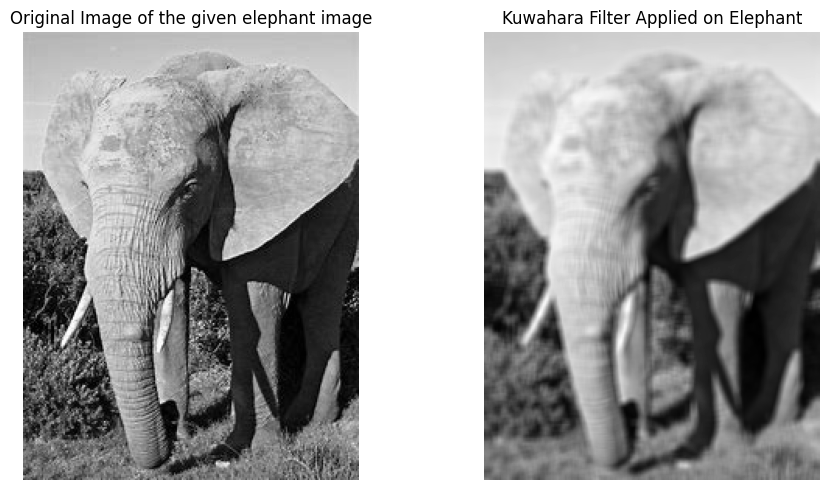

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def kuwahara_filter(image, kernel_size=5):
    gray_image = image.convert('L')
    gray_image = np.array(gray_image, dtype=np.float32)

    pad_size = kernel_size // 2
    padded_image = np.pad(gray_image, pad_size, mode='reflect')

    output_image = np.zeros_like(gray_image)

    offsets = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

    for y in range(gray_image.shape[0]):
        for x in range(gray_image.shape[1]):
            means = []
            variances = []

            for dy, dx in offsets:
                region = padded_image[y:y + kernel_size, x:x + kernel_size]

                mean = np.mean(region)
                variance = np.var(region)

                means.append(mean)
                variances.append(variance)
            min_variance_index = np.argmin(variances)
            output_image[y, x] = means[min_variance_index]

    return output_image

# Load the image to apply Kuwahara filter on it
image_path = 'Elephant.jpeg'
image = Image.open(image_path)

# Calling the Kuwahara method to apply the filters on the image
kuwahara_image = kuwahara_filter(image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.convert('L'), cmap='gray')
plt.title('Original Image of the given elephant image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kuwahara_image, cmap='gray')
plt.title('Kuwahara Filter Applied on Elephant')
plt.axis('off')

plt.tight_layout()
plt.show()

In image processing, the Kuwahara filter is a useful edge-preserving smoothing filter that is very useful for lowering noise while keeping important details like edges and textures. The Kuwahara filter uses a localized method to adaptively assess pixel neighbors, in contrast to traditional smoothing filters that can blur edges and key details.
For each pixel in the image, a square neighborhoodis divided into four overlapping regions. The filter calculates the mean and variance of pixel values within each region. The region with the lowest variance is selected, ensuring that the filter retains the most consistent pixel values. The output pixel's value is then set to the mean of this chosen region.
This method allows the Kuwahara filter to smooth areas with minimal variation effectively while preserving sharp transitions, making it particularly useful in applications requiring clarity, such as photography and medical imaging. It is also beneficial in texture processing, where maintaining the integrity of textures is crucial. Overall, the Kuwahara filter strikes a balance between noise reduction and detail preservation, making it a powerful tool in various image processing tasks.
